In [28]:
import usda.network as usda_nw

import dgl
import torch as th
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse as sp
import numpy as np

import torch
import torch.nn as nn

In [2]:
u, v = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))

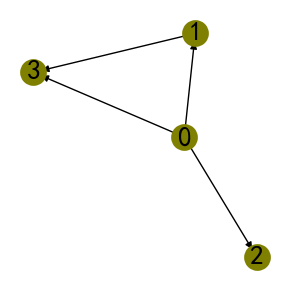

In [3]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'width': 1,
}

G=dgl.to_networkx(g)
usda_nw.G_drawing(G)

In [4]:
g=g.int()
g.idtype

torch.int32

In [5]:
g.ndata['x'] = th.ones(g.num_nodes(), 3) 
g.edata['x'] = th.ones(g.num_edges(), dtype=th.int32)
g.ndata['y'] = th.randn(g.num_nodes(), 5)

In [6]:
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [7]:
g.ndata['y']

tensor([[ 2.0133, -0.9014,  0.0645, -0.2768, -1.4673],
        [-0.0294, -0.3180,  0.5280, -0.8994, -0.0032],
        [-2.7992, -0.2146, -0.6175, -0.5193, -1.2342],
        [-0.6975, -0.0760, -0.6207,  0.6982,  0.8465]])

In [8]:
g.edata['x'][[0, 3]]

tensor([1, 1], dtype=torch.int32)

In [9]:
spmat = sp.rand(100, 100, density=0.05)
spmat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
dgl.from_scipy(spmat) 

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})

In [11]:
import dgl
import torch as th
# 创建一个具有3种节点类型和3种边类型的异构图
graph_data = {
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
}
g = dgl.heterograph(graph_data)
print(g.ntypes,g.etypes,g.canonical_etypes)

['disease', 'drug', 'gene'] ['interacts', 'interacts', 'treats'] [('drug', 'interacts', 'drug'), ('drug', 'interacts', 'gene'), ('drug', 'treats', 'disease')]


In [12]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [13]:
g.num_nodes('drug')

3

In [14]:
print(g.nodes('drug'),g.nodes('gene'),g.nodes('disease'))

tensor([0, 1, 2]) tensor([0, 1, 2, 3]) tensor([0, 1, 2])


In [15]:
g.nodes['drug'].data['hv'] = th.ones(3, 1)

In [16]:
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [17]:
g.nodes['drug']

NodeSpace(data={'hv': tensor([[1.],
        [1.],
        [1.]])})

In [18]:
g.device

device(type='cpu')

In [19]:
g=g.to('cuda:0')
g.device

device(type='cuda', index=0)

nvidia-smi

In [26]:
g.ndata['hv']['drug'].device

device(type='cuda', index=0)

In [33]:
linear = nn.Parameter(torch.FloatTensor(size=(10, 5)))
linear

Parameter containing:
tensor([[1.5921e+03, 9.1785e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       requires_grad=True)

In [34]:
linear.shape

torch.Size([10, 5])

---

In [1]:
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import FacebookPagePage

import pandas as pd

import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.utils import to_dense_adj

In [2]:
# Import dataset from PyTorch Geometric
dataset = Planetoid(root=r"C:\Users\richie\omen_richiebao\dataset", name="Cora")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [4]:
dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [3]:
# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=r"C:\Users\richie\omen_richiebao\dataset")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

Dataset: FacebookPagePage()
-----------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


In [4]:
df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)
df_x

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,0
1,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.234818,-0.223700,-0.284379,-0.197935,-0.147256,-0.255755,-0.215140,-0.364134,-0.128634,2
2,-0.262576,-0.265053,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.210461,-0.25101,3.222161,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
3,-0.246378,-0.276483,-0.241991,-0.299327,-0.299159,-0.270681,-0.307051,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.265534,-0.080353,-0.209509,-0.250560,-0.180260,-0.375903,-0.223836,2
4,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.175312,-0.272613,-0.224216,-0.181153,-0.255755,-0.215140,-0.370639,-0.223836,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,-0.262576,-0.276483,-0.262350,-0.296955,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.196685,-0.370115,-0.223836,3
22466,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.221643,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
22467,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.146793,-0.255755,-0.180389,-0.372097,-0.222613,2
22468,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307668,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.252456,-0.215140,-0.375903,-0.218148,1


In [5]:
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

In [6]:
class MLP(torch.nn.Module):
    """Multilayer Perceptron"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()      
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc


In [20]:
# Create MLP model
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

# Train
mlp.fit(data, epochs=1000)

# Test
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)
Epoch   0 | Train Loss: 1.950 | Train Acc: 17.86% | Val Loss: 1.94 | Val Acc: 12.80%
Epoch  20 | Train Loss: 0.097 | Train Acc: 100.00% | Val Loss: 1.47 | Val Acc: 54.40%
Epoch  40 | Train Loss: 0.012 | Train Acc: 100.00% | Val Loss: 1.60 | Val Acc: 53.20%
Epoch  60 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.62 | Val Acc: 50.20%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.51 | Val Acc: 50.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.45 | Val Acc: 53.20%
Epoch 120 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.42 | Val Acc: 54.20%
Epoch 140 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.41 | Val Acc: 54.20%
Epoch 160 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.39 | Val Acc: 53.60%
Epoch 180 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.39 | Val Acc: 54.20%
Epoch

In [7]:
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x

In [8]:
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [14]:
adjacency[1].sum()

tensor(35.)

In [9]:
adjacency.shape

torch.Size([22470, 22470])

In [10]:
class VanillaGNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [11]:
data.x.shape

torch.Size([22470, 128])

In [27]:
# Create the Vanilla GNN model
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

# Train
gnn.fit(data, epochs=100)

# Test
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)
Epoch   0 | Train Loss: 2.039 | Train Acc: 16.43% | Val Loss: 2.10 | Val Acc: 8.80%
Epoch  20 | Train Loss: 0.025 | Train Acc: 100.00% | Val Loss: 2.20 | Val Acc: 74.40%
Epoch  40 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.95 | Val Acc: 73.20%
Epoch  60 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.04 | Val Acc: 73.80%
Epoch  80 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.96 | Val Acc: 74.20%
Epoch 100 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.89 | Val Acc: 74.40%

GNN test accuracy: 75.10%


In [6]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [7]:
dataset.num_features

1433

---

In [63]:
"""
Original Demo: http://js.cytoscape.org/demos/cose-layout/

Note: This implementation looks different from the original implementation,
although the input parameters are exactly the same.
"""
import requests
import json

from dash import Dash, html, Input, Output, callback
import dash_cytoscape as cyto

def load_json(st):
    if 'http' in st:
        return requests.get(st).json()
    else:
        with open(st, 'rb') as f:
            x = json.load(f)
        return x

app = Dash(__name__)
server = app.server

# Load Data
elements = load_json('https://js.cytoscape.org/demos/colajs-graph/data.json')
stylesheet = load_json('https://js.cytoscape.org/demos/colajs-graph/cy-style.json')

styles = {
    'container': {
        'position': 'fixed',
        'display': 'flex',
        'flex-direction': 'column',
        'height': '100%',
        'width': '100%'
    },
    'cy-container': {
        'flex': '1',
        'position': 'relative'
    },
    'cytoscape': {
        'position': 'absolute',
        'width': '100%',
        'height': '100%',
        'z-index': 999
    }
}

# App
app.layout = html.Div(style=styles['container'], children=[
    html.Div([
        html.Button("Responsive Toggle", id='toggle-button'),
        html.Div(id='toggle-text')
    ]),
    html.Div(className='cy-container', style=styles['cy-container'], children=[
        cyto.Cytoscape(
            id='cytoscape-responsive-layout',
            elements=elements,
            stylesheet=stylesheet,
            style=styles['cytoscape'],
            layout={
                'name': 'cose',
                'idealEdgeLength': 100,
                'nodeOverlap': 20,
                'refresh': 20,
                'fit': True,
                'padding': 30,
                'randomize': False,
                'componentSpacing': 100,
                'nodeRepulsion': 400000,
                'edgeElasticity': 100,
                'nestingFactor': 5,
                'gravity': 80,
                'numIter': 1000,
                'initialTemp': 200,
                'coolingFactor': 0.95,
                'minTemp': 1.0
            },
            responsive=True
        )
    ])
])

@callback(Output('cytoscape', 'responsive'), Input('toggle-button', 'n_clicks'))
def toggle_responsive(n_clicks):
    n_clicks = 2 if n_clicks is None else n_clicks
    toggle_on = n_clicks % 2 == 0
    return toggle_on

@callback(Output('toggle-text', 'children'), Input('cytoscape', 'responsive'))
def update_toggle_text(responsive):
    return '\t' + 'Responsive ' + ('On' if responsive else 'Off')

if __name__ == '__main__':
    app.run(debug=True)

In [3]:
import json

from dash import Dash, html, Input, Output, callback
import dash_cytoscape as cyto

app = Dash(__name__)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}


nodes = [
    {
        'data': {'id': short, 'label': label},
        'position': {'x': 20*lat, 'y': -20*long}
    }
    for short, label, long, lat in (
        ('la', 'Los Angeles', 34.03, -118.25),
        ('nyc', 'New York', 40.71, -74),
        ('to', 'Toronto', 43.65, -79.38),
        ('mtl', 'Montreal', 45.50, -73.57),
        ('van', 'Vancouver', 49.28, -123.12),
        ('chi', 'Chicago', 41.88, -87.63),
        ('bos', 'Boston', 42.36, -71.06),
        ('hou', 'Houston', 29.76, -95.37)
    )
]

edges = [
    {'data': {'source': source, 'target': target}}
    for source, target in (
        ('van', 'la'),
        ('la', 'chi'),
        ('hou', 'chi'),
        ('to', 'mtl'),
        ('mtl', 'bos'),
        ('nyc', 'bos'),
        ('to', 'hou'),
        ('to', 'nyc'),
        ('la', 'nyc'),
        ('nyc', 'bos')
    )
]


default_stylesheet = [
    {
        'selector': 'node',
        'style': {
            'background-color': '#BFD7B5',
            'label': 'data(label)'
        }
    }
]


app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-event-callbacks-1',
        layout={'name': 'preset'},
        elements=edges+nodes,
        stylesheet=default_stylesheet,
        style={'width': '100%', 'height': '450px'}
    ),
    html.Pre(id='cytoscape-tapNodeData-json', style=styles['pre'])
])


@callback(Output('cytoscape-tapNodeData-json', 'children'),
              Input('cytoscape-event-callbacks-1', 'tapNodeData'))
def displayTapNodeData(data):
    return json.dumps(data, indent=2)


if __name__ == '__main__':
    app.run(debug=True)


In [1]:
from dash import Dash, html, Input, Output, callback
import dash_cytoscape as cyto

app = Dash(__name__)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}


nodes = [
    {
        'data': {'id': short, 'label': label},
        'position': {'x': 20*lat, 'y': -20*long}
    }
    for short, label, long, lat in (
        ('la', 'Los Angeles', 34.03, -118.25),
        ('nyc', 'New York', 40.71, -74),
        ('to', 'Toronto', 43.65, -79.38),
        ('mtl', 'Montreal', 45.50, -73.57),
        ('van', 'Vancouver', 49.28, -123.12),
        ('chi', 'Chicago', 41.88, -87.63),
        ('bos', 'Boston', 42.36, -71.06),
        ('hou', 'Houston', 29.76, -95.37)
    )
]

edges = [
    {'data': {'source': source, 'target': target}}
    for source, target in (
        ('van', 'la'),
        ('la', 'chi'),
        ('hou', 'chi'),
        ('to', 'mtl'),
        ('mtl', 'bos'),
        ('nyc', 'bos'),
        ('to', 'hou'),
        ('to', 'nyc'),
        ('la', 'nyc'),
        ('nyc', 'bos')
    )
]


default_stylesheet = [
    {
        'selector': 'node',
        'style': {
            'background-color': '#BFD7B5',
            'label': 'data(label)'
        }
    }
]


app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-event-callbacks-2',
        layout={'name': 'preset'},
        elements=edges+nodes,
        stylesheet=default_stylesheet,
        style={'width': '100%', 'height': '450px'}
    ),
    html.P(id='cytoscape-tapNodeData-output'),
    html.P(id='cytoscape-tapEdgeData-output'),
    html.P(id='cytoscape-mouseoverNodeData-output'),
    html.P(id='cytoscape-mouseoverEdgeData-output')
])


@callback(Output('cytoscape-tapNodeData-output', 'children'),
              Input('cytoscape-event-callbacks-2', 'tapNodeData'))
def displayTapNodeData(data):
    if data:
        return "You recently clicked/tapped the city: " + data['label']


@callback(Output('cytoscape-tapEdgeData-output', 'children'),
              Input('cytoscape-event-callbacks-2', 'tapEdgeData'))
def displayTapEdgeData(data):
    if data:
        return "You recently clicked/tapped the edge between " + \
               data['source'].upper() + " and " + data['target'].upper()


@callback(Output('cytoscape-mouseoverNodeData-output', 'children'),
              Input('cytoscape-event-callbacks-2', 'mouseoverNodeData'))
def displayTapNodeData(data):
    if data:
        return "You recently hovered over the city: " + data['label']


@callback(Output('cytoscape-mouseoverEdgeData-output', 'children'),
              Input('cytoscape-event-callbacks-2', 'mouseoverEdgeData'))
def displayTapEdgeData(data):
    if data:
        return "You recently hovered over the edge between " + \
               data['source'].upper() + " and " + data['target'].upper()


if __name__ == '__main__':
    app.run(debug=True)
